In [101]:
import  warnings

import metrics

warnings.filterwarnings('ignore')

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
nba_df = pd.read_csv('../data/raw/train.csv', low_memory=False)


In [104]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [105]:
nba_df['ht']

0         2-Jun
1         4-Jun
2         4-Jun
3         4-Jun
4         8-Jun
          ...  
46613     5-Jun
46614     1-Jun
46615    10-May
46616    Jun-00
46617     4-Jun
Name: ht, Length: 46618, dtype: object

In [106]:
metadata_df = pd.read_csv('../data/raw/metadata.csv')

In [107]:
metadata_df

,feature,name,description
0,1,team,Name of team
1,2,conf,Name of conference
2,3,GP,Games played
3,4,Min_per,Player's percentage of available team minutes ...
4,5,ORtg,ORtg - Offensive Rating (available since the 1...
...,...,...,...
59,66,stl,STL - Steals (available since the 1973-74 seas...
60,67,blk,BLK - Blocks (available since the 1973-74 seas...
61,68,pts,PTS - Points
62,69,player_id,Unique identifier of player


In [108]:
missing_nba_df_values = nba_df.isnull().sum()
percentage_missing = (nba_df.isnull().sum() / len(nba_df)) * 100

missing_values_df = pd.DataFrame({'missing_values': missing_nba_df_values, 'percentage_of_missing_values': percentage_missing})

missing_values_df

,missing_values,percentage_of_missing_values
team,0,0.000000
conf,0,0.000000
GP,0,0.000000
Min_per,0,0.000000
Ortg,0,0.000000
...,...,...
stl,36,0.077223
blk,36,0.077223
pts,36,0.077223
player_id,0,0.000000


<Axes: xlabel='ast_tov', ylabel='Count'>

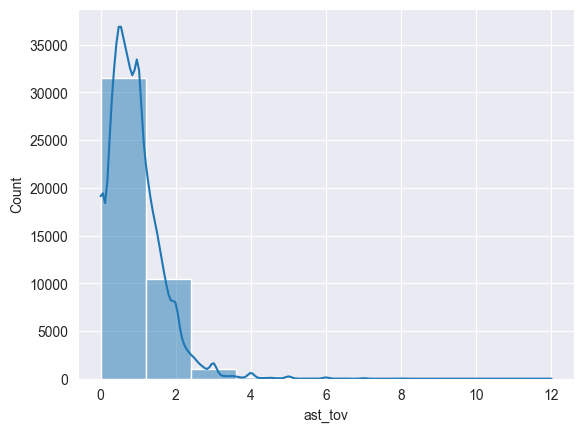

In [109]:
sns.histplot(data=nba_df, x = 'ast_tov', bins= 10, kde= True)

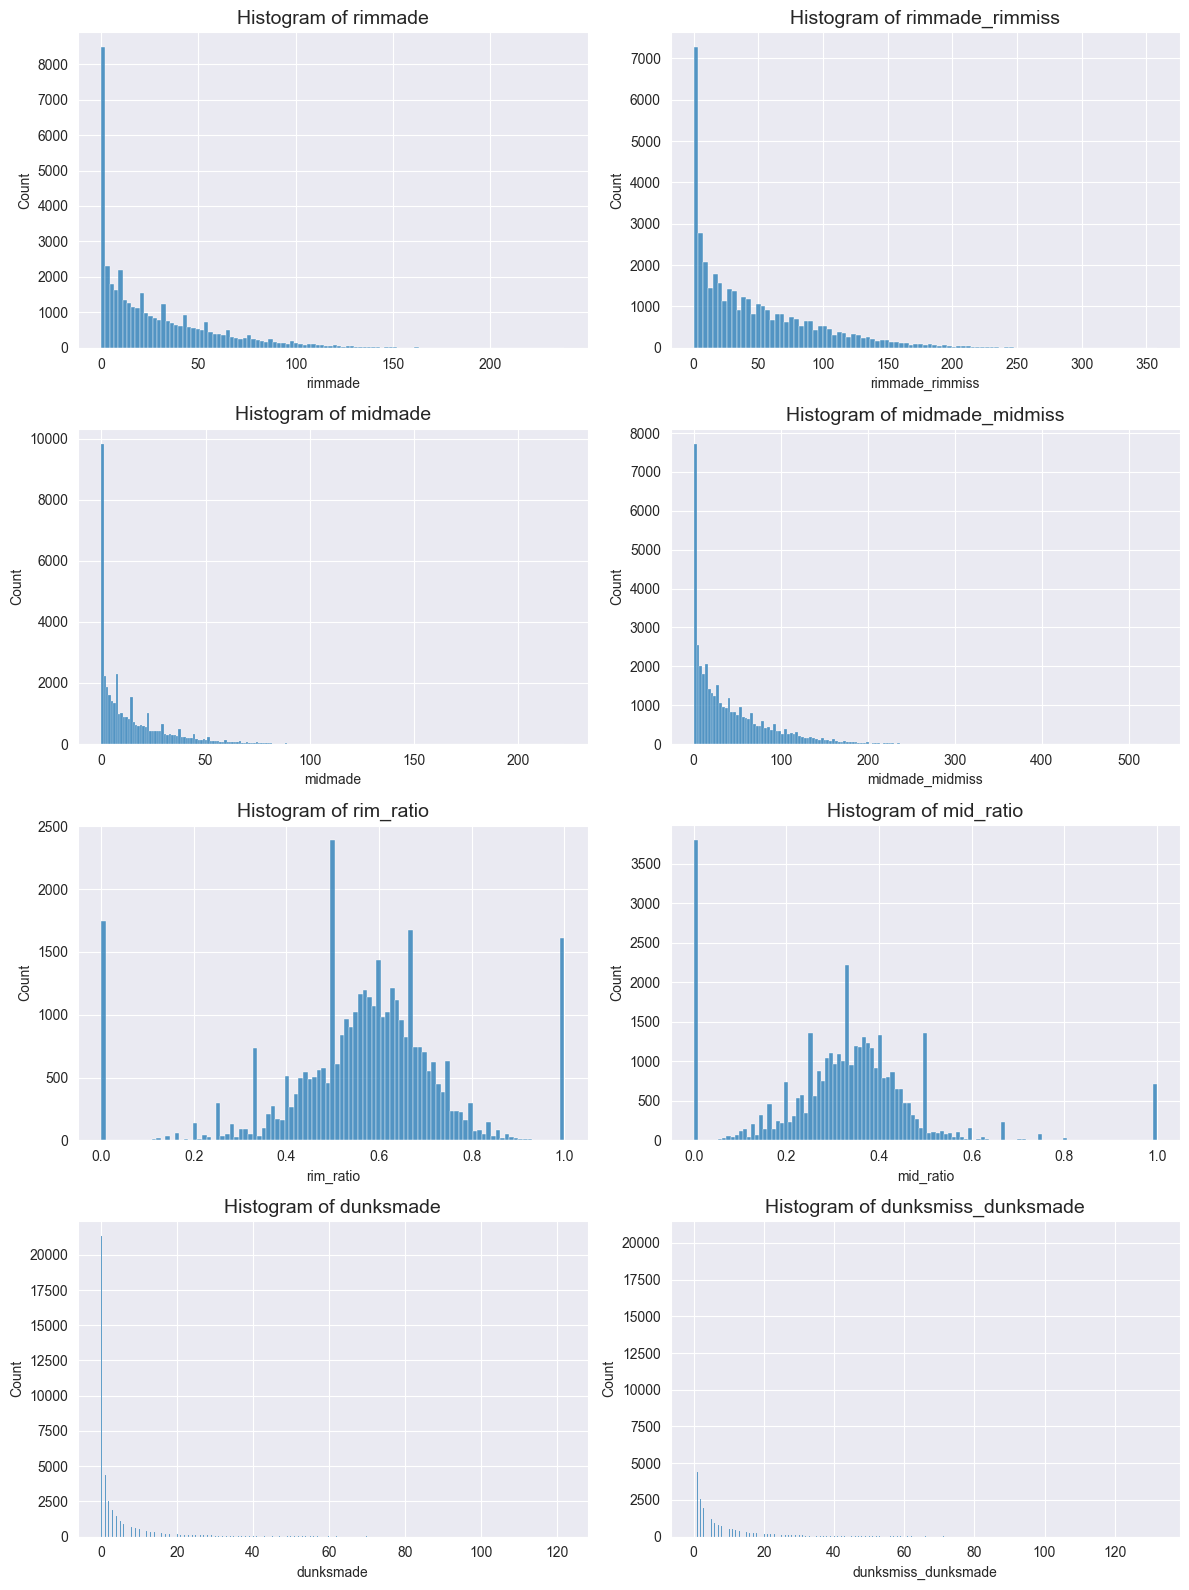

In [110]:
import matplotlib.pyplot as plt

columns = ['rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
           'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade']

# Compute the number of subplots: (rows, columns)
n = len(columns)
ncols = 2 # You can change it according to your needs
nrows = n // ncols + (n % ncols > 0)

# Create a figure and an array of subplots
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

# Flat the axes for easy iteration
ax = ax.flat

for i, col in enumerate(columns):
    # Plot histogram on ith subplot
    sns.histplot(nba_df[col], ax=ax[i])
    ax[i].set_title(f'Histogram of {col}', fontsize=14)

plt.tight_layout()
plt.show()

In [111]:
nba_df['yr'].fillna((nba_df['yr'].mode()), inplace=True)
nba_df['ast_tov'].fillna((nba_df['ast_tov'].median()), inplace=True)
nba_df['rimmade'].fillna((nba_df['rimmade'].median()), inplace=True)
nba_df['midmade'].fillna((nba_df['midmade'].median()), inplace=True)
nba_df['dunksmade'].fillna((nba_df['dunksmade'].median()), inplace=True)
nba_df['rim_ratio'].fillna((nba_df['rim_ratio'].mean()), inplace=True)

nba_df['mid_ratio'].fillna((nba_df['mid_ratio'].mean()), inplace=True)
nba_df['rimmade_rimmiss'].fillna((nba_df['rimmade_rimmiss'].median()), inplace=True)
nba_df['midmade_midmiss'].fillna(nba_df['midmade_midmiss'].median(), inplace=True)
nba_df['dunksmiss_dunksmade'].fillna((nba_df['dunksmiss_dunksmade'].median()), inplace=True)
nba_df.drop(['num','ht'], axis =1, inplace=True)

# Calculate the threshold as 1% of total length of the dataframe
threshold = 0.01 * len(nba_df)

for col in nba_df:
    if nba_df[col].isnull().sum() < threshold:
        nba_df[col].fillna(nba_df[col].mode()[0], inplace=True)

In [112]:
nba_df.isna().sum()

team         0
conf         0
GP           0
Min_per      0
Ortg         0
            ..
stl          0
blk          0
pts          0
player_id    0
drafted      0
Length: 62, dtype: int64

In [113]:
print("Columns with more than 50% Missing Values:")

columns_to_drop = missing_values_df[missing_values_df['percentage_of_missing_values'] > 40
]
print(columns_to_drop)
print(nba_df.shape)
nba_df.drop(columns=columns_to_drop.index, inplace=True)
print(nba_df.shape)

Columns with more than 50% Missing Values:
             missing_values  percentage_of_missing_values
Rec_Rank              32281                     69.245785
dunks_ratio           26218                     56.240079
pick                  45411                     97.410871
(46618, 62)
(46618, 59)


In [114]:
nba_df.isna().sum()

team                   0
conf                   0
GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
yr                     0
porpag                 0
adjoe                  0
pfr                    0
year                   0
type                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
drtg                   0


In [115]:
nba_df[nba_df.duplicated()]

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted


Therefore, No duplicate values

Handle Outliers

In [116]:
from scipy import stats

In [117]:
import pandas as pd

def find_outliers_iqr_all(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers.drop_duplicates()

# Applying the IQR method to all columns
outliers_iqr = find_outliers_iqr_all(nba_df)
outliers_iqr.to_csv('outliers_iqr_all.csv', index=False)


In [118]:
nba_df

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46613,Southern Illinois,MVC,1,0.1,0.0,20.0,0.0,0.00,0.0,0.0,...,-21.537200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7da0b8f8-3582-496b-9a93-a4e76e073650,0.0
46614,Texas Southern,SWAC,3,0.3,20.3,36.1,0.0,0.00,0.0,26.3,...,-13.655700,0.0000,0.3333,0.3333,0.3333,0.3333,0.0000,0.0000,523630b3-3155-47a5-b214-299e8117913d,0.0
46615,Western Illinois,Sum,1,0.3,0.0,0.0,0.0,0.00,0.0,0.0,...,-6.035070,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9818a0c6-2ceb-4e55-9483-76c177322f3c,0.0
46616,Northern Illinois,MAC,1,0.1,54.0,20.0,0.0,0.00,0.0,0.0,...,-12.849200,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,3237ee2e-9cf8-4d6b-a348-b5619804afd7,0.0


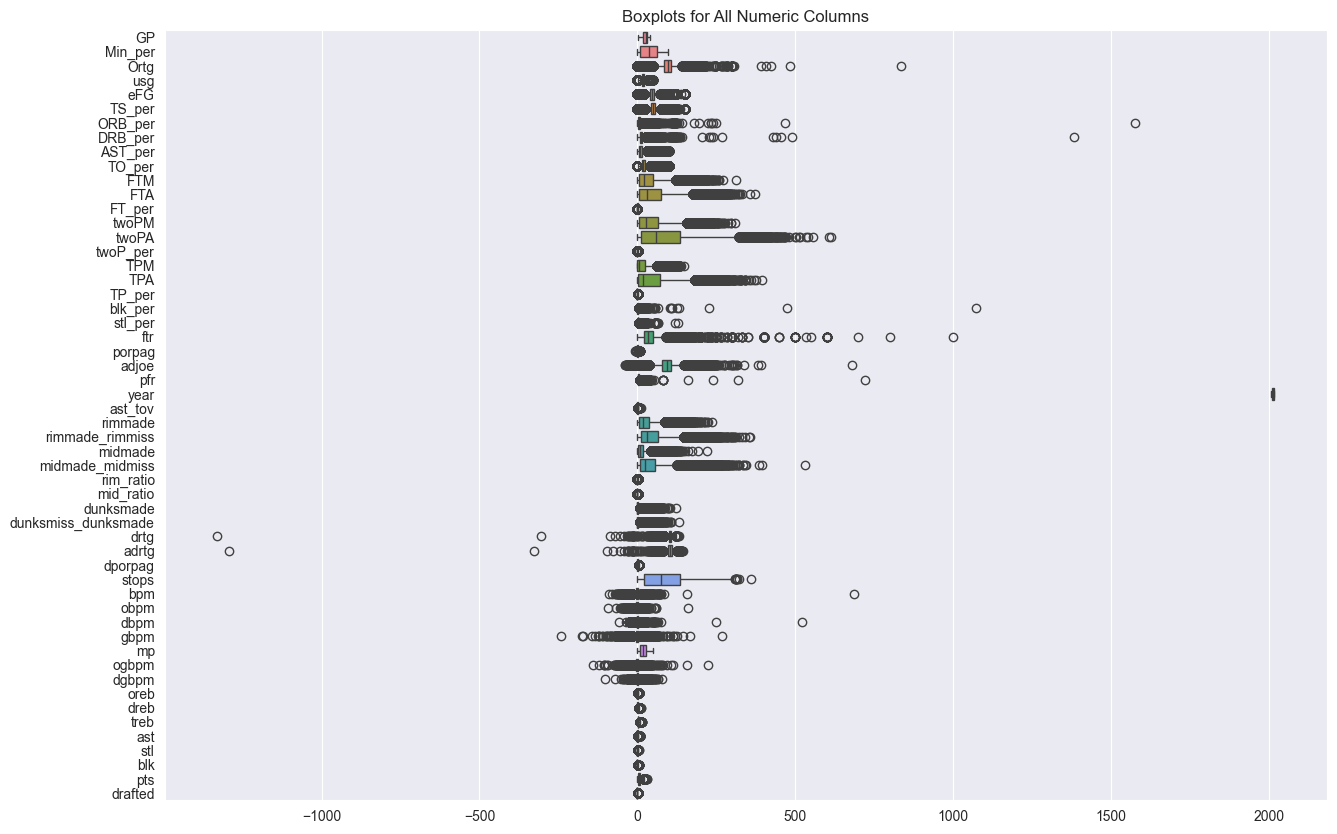

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for all numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=nba_df.select_dtypes(include=['float64', 'int64']), orient='h')
plt.title('Boxplots for All Numeric Columns')
plt.show()


In [120]:
# def cap_outliers(df, column, lower_quantile=0.05, upper_quantile=0.90):
#     lower_cap = df[column].quantile(lower_quantile)
#     upper_cap = df[column].quantile(upper_quantile)
#     df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
#     df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
#     return df
# 
# # Apply capping to the specified columns
# for column in nba_df.columns:
#     nba_df = cap_outliers(nba_df, column)


In [121]:
nba_df

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46613,Southern Illinois,MVC,1,0.1,0.0,20.0,0.0,0.00,0.0,0.0,...,-21.537200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7da0b8f8-3582-496b-9a93-a4e76e073650,0.0
46614,Texas Southern,SWAC,3,0.3,20.3,36.1,0.0,0.00,0.0,26.3,...,-13.655700,0.0000,0.3333,0.3333,0.3333,0.3333,0.0000,0.0000,523630b3-3155-47a5-b214-299e8117913d,0.0
46615,Western Illinois,Sum,1,0.3,0.0,0.0,0.0,0.00,0.0,0.0,...,-6.035070,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9818a0c6-2ceb-4e55-9483-76c177322f3c,0.0
46616,Northern Illinois,MAC,1,0.1,54.0,20.0,0.0,0.00,0.0,0.0,...,-12.849200,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,3237ee2e-9cf8-4d6b-a348-b5619804afd7,0.0


In [122]:
nba_df.drop(['player_id'], axis=1, inplace=True)

In [123]:
nba_df['yr'].value_counts()

yr
Jr      12693
Fr      12312
So      10979
Sr      10627
0           5
57.1        1
42.9        1
Name: count, dtype: int64

In [124]:
# Convert 'yr' to a string type
nba_df['yr'] = nba_df['yr'].astype(str)
# Filter to only include rows with 'yr' values 'Jr', 'Fr', 'So', and 'Sr'
nba_df = nba_df[nba_df['yr'].isin(['Jr', 'Fr', 'So', 'Sr'])]

print(nba_df['yr'].value_counts())



yr
Jr    12693
Fr    12312
So    10979
Sr    10627
Name: count, dtype: int64


In [125]:
# Convert the 'yr' column to a categorical type and then to numeric codes
nba_df['yr'] = nba_df['yr'].astype('category').cat.codes

# Check the unique values in 'yr' after conversion
print(nba_df['yr'].unique())


[2 3 1 0]


In [126]:
from category_encoders import TargetEncoder

# Initialize the target encoder
target_encoder = TargetEncoder(cols=['team', 'conf'])

# Fit the encoder and transform the columns
nba_df[['team', 'conf']] = target_encoder.fit_transform(nba_df[['team', 'conf']], nba_df['drafted'])

# Check the transformed values
print(nba_df[['team', 'conf']].head())



           team      conf
0  1.590919e-07  0.002596
1  2.373352e-07  0.004472
2  8.064561e-03  0.027501
3  4.335812e-08  0.005738
4  9.649473e-08  0.000831


Preparing Dataframes for different models

In [127]:
nba_df.drop(['type'], axis=1, inplace=True)

In [128]:
nba_df_logistic = nba_df.copy()

In [129]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (excluding the target variable)
nba_df_scaled = nba_df.copy()
nba_df_scaled.iloc[:, :-1] = scaler.fit_transform(nba_df.iloc[:, :-1])

# Verify the scaling
print(nba_df_scaled.head())




       team      conf        GP   Min_per      Ortg       usg       eFG  \
0 -0.416603 -0.483254  0.243601 -0.279972  0.182362 -0.253536 -0.106927   
1 -0.416599 -0.352424  1.037663  0.840726  0.546320 -0.528636  0.442432   
2 -0.064167  1.253130  0.342859  1.236897  0.145966  0.587945  0.070644   
3 -0.416608 -0.264200  0.640632  0.255394  0.195597 -0.350630  0.509021   
4 -0.416606 -0.606317  0.938405  0.672979  0.155892  0.620310  0.464629   

     TS_per   ORB_per   DRB_per  ...     ogbpm     dgbpm      oreb      dreb  \
0 -0.182684 -0.406048 -0.722361  ... -0.110707 -0.447100 -0.786269 -0.853466   
1  0.401224 -0.185725 -0.568388  ...  0.331893  0.065623 -0.136398 -0.410323   
2  0.023572 -0.355974 -0.414414  ...  0.591398 -0.126731 -0.199345  0.318990   
3  0.355324 -0.155681 -0.287612  ...  0.284789  0.021556 -0.104857 -0.295255   
4  0.391346  0.264933  0.545655  ...  0.067182 -0.061674  0.867132  0.980804   

       treb       ast       stl       blk       pts  drafted  
0 -0.

In [225]:
nba_df_scaled

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,-0.416603,-0.483254,0.243601,-0.279972,0.182362,-0.253536,-0.106927,-0.182684,-0.406048,-0.722361,...,-0.110707,-0.447100,-0.786269,-0.853466,-0.875799,0.107700,-0.385801,-0.579438,-0.373088,0
1,-0.416599,-0.352424,1.037663,0.840726,0.546320,-0.528636,0.442432,0.401224,-0.185725,-0.568388,...,0.331893,0.065623,-0.136398,-0.410323,-0.335202,0.646996,-0.246135,-0.113839,0.042968,0
2,-0.064167,1.253130,0.342859,1.236897,0.145966,0.587945,0.070644,0.023572,-0.355974,-0.414414,...,0.591398,-0.126731,-0.199345,0.318990,0.152122,0.766185,-0.097741,-0.670523,1.306149,0
3,-0.416608,-0.264200,0.640632,0.255394,0.195597,-0.350630,0.509021,0.355324,-0.155681,-0.287612,...,0.284789,0.021556,-0.104857,-0.295255,-0.243585,0.028839,0.083654,-0.355156,-0.160933,0
4,-0.416606,-0.606317,0.938405,0.672979,0.155892,0.620310,0.464629,0.391346,0.264933,0.545655,...,0.067182,-0.061674,0.867132,0.980804,0.993564,-0.186042,-0.155225,0.118013,0.373653,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46613,-0.416602,-0.556798,-2.237842,-1.329287,-3.037019,0.296663,-2.465285,-2.764077,-0.566282,-1.138995,...,-4.715608,-6.380984,-1.044365,-1.273473,-1.261013,-0.910999,-1.122877,-0.670523,-1.158954,0
46614,-0.416607,-0.664222,-2.039327,-1.322149,-2.365349,2.902019,-2.465285,-2.764077,-0.566282,1.243065,...,-7.973310,-3.994386,-1.044365,-1.045998,-1.102053,-0.626228,-0.413265,-0.670523,-1.158954,0
46615,-0.416599,-0.542550,-2.237842,-1.322149,-3.037019,-2.939804,-2.465285,-2.764077,-0.566282,-1.138995,...,-0.555666,-1.686781,-1.044365,-1.273473,-1.261013,-0.910999,-1.122877,-0.670523,-1.158954,0
46616,-0.416607,-0.620539,-2.237842,-1.329287,-1.250312,0.296663,-2.465285,-2.764077,-0.566282,-1.138995,...,0.760526,-3.750169,-1.044365,-1.273473,-1.261013,-0.056600,-1.122877,-0.670523,-1.158954,0


In [130]:


# Compute the correlation matrix on the scaled data
corr_matrix = nba_df_scaled.corr()

# Focus on the correlation of all features with the target variable
corr_with_target = corr_matrix['drafted'].sort_values(ascending=False)
print(corr_with_target)


drafted                1.000000
porpag                 0.254410
team                   0.235597
dunksmade              0.228866
twoPM                  0.226985
dunksmiss_dunksmade    0.225988
dporpag                0.225270
FTM                    0.215518
FTA                    0.211458
twoPA                  0.211330
midmade                0.200668
midmade_midmiss        0.197019
pts                    0.192698
stops                  0.191482
rimmade                0.188438
dreb                   0.180338
treb                   0.172821
rimmade_rimmiss        0.167540
blk                    0.147716
conf                   0.147671
oreb                   0.131706
mp                     0.131389
Min_per                0.130327
stl                    0.124418
bpm                    0.124088
ast                    0.121565
gbpm                   0.119563
obpm                   0.119470
ogbpm                  0.116435
TPM                    0.113997
adjoe                  0.113479
TPA     

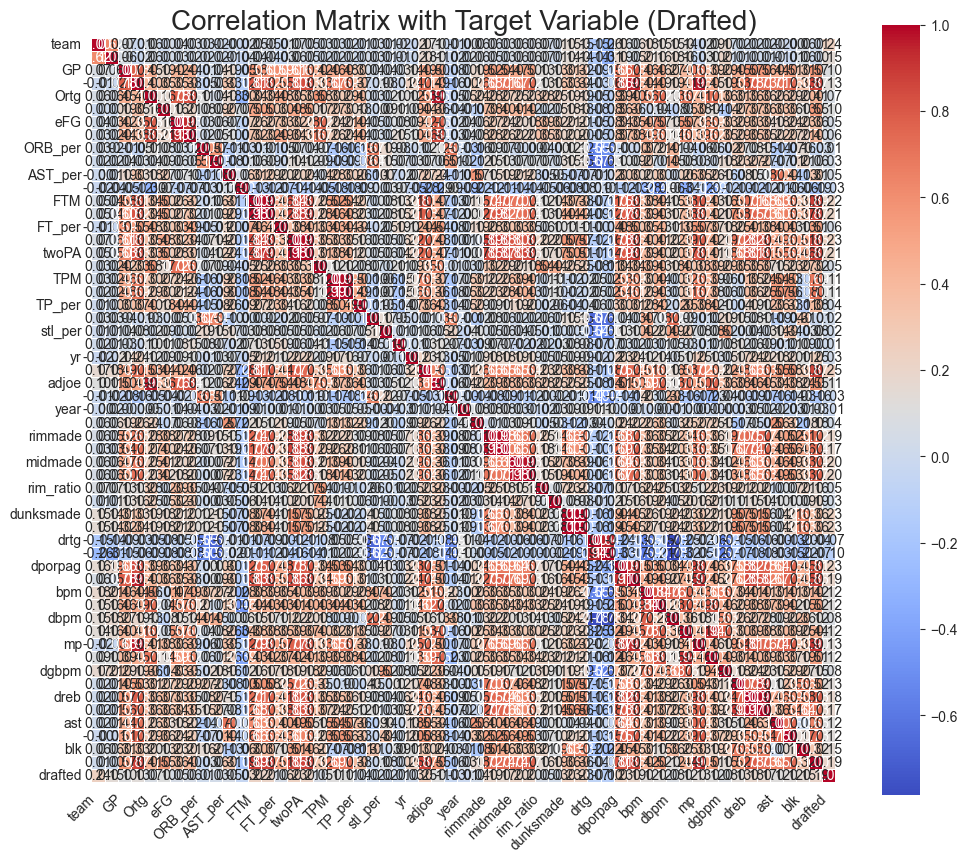

In [131]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Customize the heatmap
plt.title('Correlation Matrix with Target Variable (Drafted)', size=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()


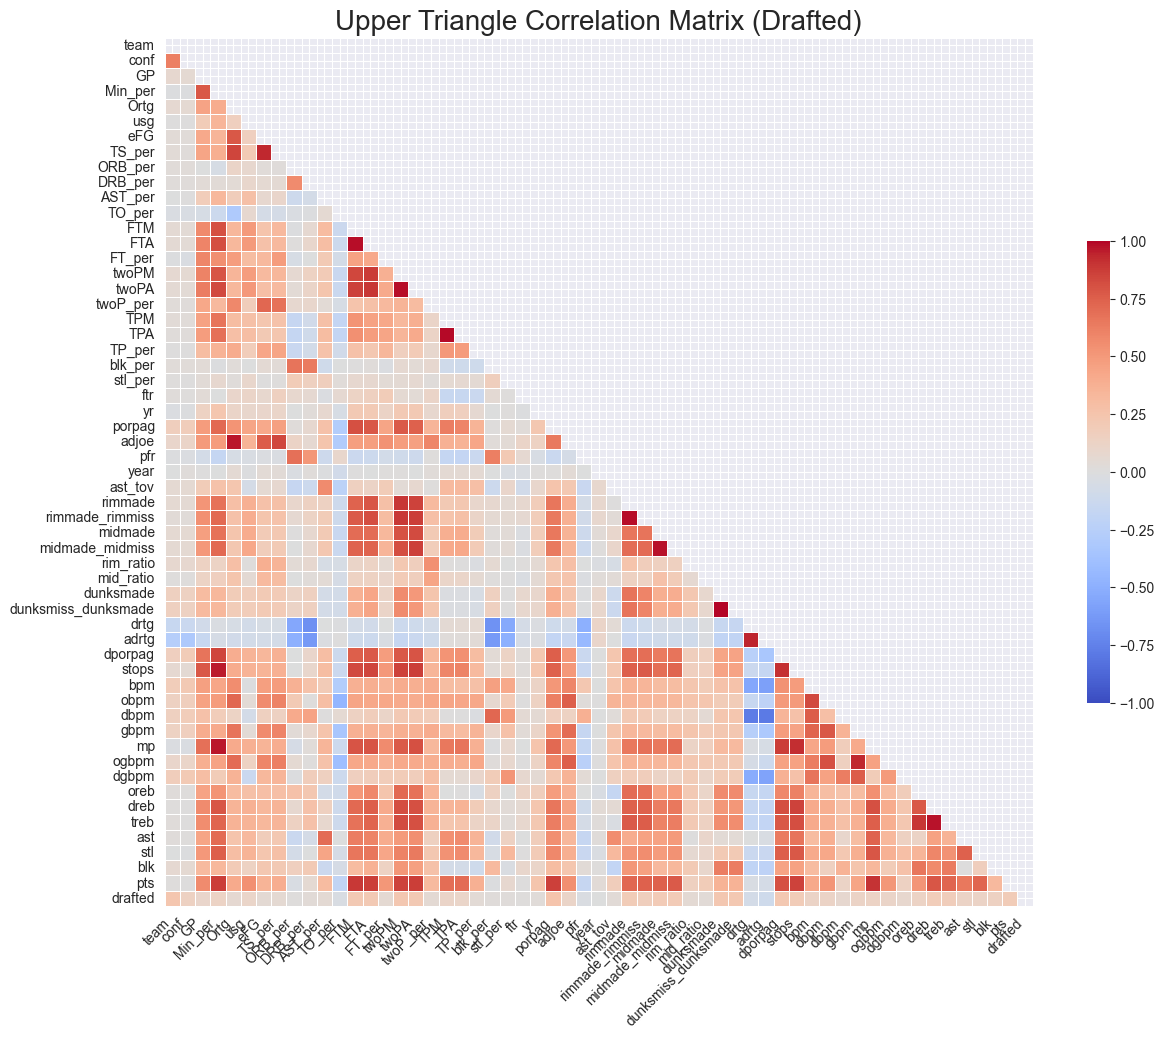

In [132]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = nba_df_scaled.corr()

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and no annotations
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

# Customize the heatmap
plt.title('Upper Triangle Correlation Matrix (Drafted)', size=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()


In [133]:
# Set a threshold for selecting relevant features based on their correlation with the 'drafted' column
threshold = 0.2

# Identify features that have a correlation greater than the threshold with the 'drafted' column
relevant_features = corr_matrix.index[corr_matrix['drafted'].abs() > threshold]

# Filter the correlation matrix to include only these relevant features
filtered_corr_matrix = corr_matrix.loc[relevant_features, relevant_features]


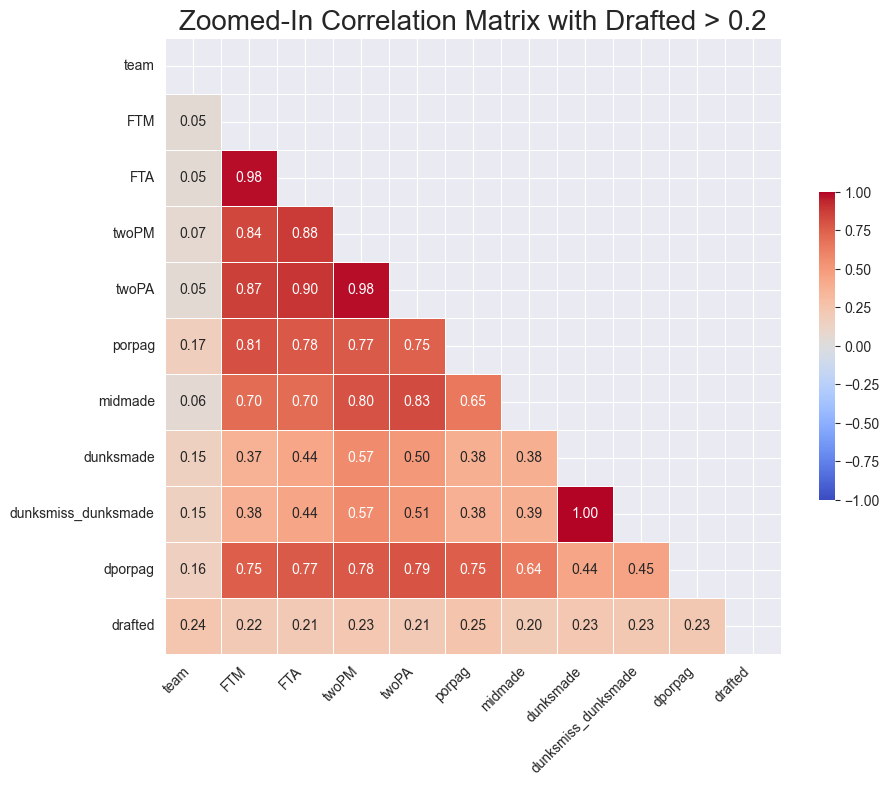

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the size for a more zoomed-in view

# Draw the heatmap with the mask and annotations
sns.heatmap(filtered_corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5})

# Customize the heatmap
plt.title('Zoomed-In Correlation Matrix with Drafted > 0.2', size=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the plot
plt.show()


In [135]:
# Check the target variable's data type
print(nba_df_scaled['drafted'].dtype)

# If it's not already an integer or categorical, convert it
nba_df_scaled['drafted'] = nba_df_scaled['drafted'].astype(int)


float64


In [136]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(nba_df_scaled.drop(columns=['drafted']), nba_df_scaled['drafted'])

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=nba_df_scaled.columns[:-1])

# Display the top features
top_features = feature_importances.nlargest(20).index  # Select the top 10 features
print(top_features)


Index(['dporpag', 'team', 'stops', 'porpag', 'bpm', 'gbpm', 'ogbpm', 'twoPM',
       'adjoe', 'obpm', 'conf', 'twoPA', 'adrtg', 'dunksmade',
       'dunksmiss_dunksmade', 'FTM', 'pts', 'FTA', 'blk', 'mp'],
      dtype='object')


In [226]:
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import  RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA

# Select all features except 'drafted' for X
X = nba_df_scaled.drop('drafted', axis=1)
y = nba_df_scaled['drafted']
y = y.astype(int)

# Initiate PCA
pca = PCA()

# Fit PCA to data
pca.fit(X)

# Get the cumulative sum of explained variance ratio
var_exp_cumsum = pca.explained_variance_ratio_.cumsum()

# Find the number of components for more than 95% variance
n_components = len(var_exp_cumsum[var_exp_cumsum <= 0.99])

# Apply PCA with n_components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(f"Number of PCA components used: {X_pca.shape[1]}")




Number of PCA components used: 35


In [175]:
X

,dporpag,team,stops,porpag,bpm,gbpm,ogbpm,twoPM,adjoe,obpm,conf,twoPA,adrtg,dunksmade,dunksmiss_dunksmade,FTM,pts,FTA,blk,mp
0,-0.505469,-0.416603,-0.500947,-0.389113,-0.320829,-0.261322,-0.110707,-0.354346,0.003583,0.053629,-0.483254,-0.210076,0.439446,-0.441998,-0.452227,-0.626243,-0.373088,-0.675323,-0.579438,-0.222059
1,0.428634,-0.416599,0.451389,0.414155,0.404802,0.271495,0.331893,0.330269,0.351677,0.634013,-0.352424,0.315899,0.043862,-0.441998,-0.452227,-0.090141,0.042968,-0.057673,-0.113839,0.713541
2,1.265094,-0.064167,0.498911,1.114718,0.328207,0.387776,0.591398,0.581295,0.483482,0.564433,1.253130,0.830186,-0.119546,-0.441998,-0.452227,0.311935,1.306149,0.380659,-0.670523,1.527243
3,-0.197235,-0.416608,0.024757,-0.169228,0.200829,0.218967,0.284789,-0.377166,0.128010,0.269820,-0.264200,-0.268518,0.266565,-0.441998,-0.452227,-0.519023,-0.160933,-0.416309,-0.355156,0.096605
4,0.535349,-0.416606,0.698816,0.209174,0.089382,0.024179,0.067182,1.174628,0.279574,-0.008613,-0.606317,1.052264,-0.244975,-0.441998,-0.452227,0.821232,0.373653,1.317096,0.118013,0.561223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46613,-1.279021,-0.416602,-1.267457,-0.807989,-2.944664,-6.043305,-4.715608,-0.947679,-2.912161,-3.062206,-0.556798,-1.004883,0.362259,-0.441998,-0.452227,-0.894294,-1.158954,-0.914413,-0.670523,-1.498376
46614,-1.265625,-0.416607,-1.259463,-0.834266,-6.733985,-7.514236,-7.973310,-0.947679,-2.447436,-7.965238,-0.664222,-1.004883,0.004479,-0.441998,-0.452227,-0.894294,-1.158954,-0.954262,-0.670523,-1.467044
46615,-1.261512,-0.416599,-1.264143,-1.314029,-0.354015,-1.085090,-0.555666,-0.947679,-3.136159,-0.388000,-0.542550,-1.004883,1.481209,-0.441998,-0.452227,-0.894294,-1.158954,-0.954262,-0.670523,-1.310363
46616,-1.290964,-0.416607,-1.267362,-0.673241,-3.202497,-0.928074,0.760526,-0.947679,-1.214219,-0.641522,-0.620539,-1.004883,0.681270,-0.441998,-0.452227,-0.894294,-1.158954,-0.954262,-0.670523,-1.498376


In [138]:
nba_df_scaled.isna().sum()

team                   0
conf                   0
GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
yr                     0
porpag                 0
adjoe                  0
pfr                    0
year                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
drtg                   0
adrtg                  0


In [176]:
# from sklearn.decomposition import PCA
# 
# # Let's suppose `df` is your DataFrame and you have top_features list
# X = nba_df_scaled[top_features]
# 
# # We will reduce the 20 features to 10 principal components
# pca = PCA(n_components=10)
# 
# # Apply PCA to the data
# X_pca = pca.fit_transform(X)

In [202]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# 
# # assuming y is your targets series
# X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# 
# D_train = xgb.DMatrix(X_train, label=y_train)
# D_val = xgb.DMatrix(X_val, label=y_val)
# 
# param = {
#     'eta': 0.3,
#     'max_depth': 3,
#     'objective': 'binary:logistic'
# }
# 
# model = xgb.train(param, D_train, 20)
# 
# # now you can use this model to make predictions
# # To compute probabilities, you can use the predict function
# # The 'predict' function for a binary logistic function in xgboost outputs the probability
# # of the positive class, so no need to use 'predict_proba'
# y_pred_proba = model.predict(D_val)
# # now y_pred_proba is an array containing predicted probabilities

In [204]:
len(y_pred_proba)

9323

In [240]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming that 'probs' is the array of probabilities of the positive class 
# predicted by the classifier, and y_test' are the true labels

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [9322, 9323]

In [ ]:

# logistic_model = LogisticRegression(random_state=42)
# logistic_model.fit(X, y)

In [ ]:
# Polynomial Logistic Regression
# polynomial_logistic_model = make_pipeline(PolynomialFeatures(2), LogisticRegression())
# polynomial_logistic_model.fit(X, y)


In [183]:
def data_cleaning(nba_df):
    # Impute missing values
    nba_df['yr'].fillna((nba_df['yr'].mode()), inplace=True)
    nba_df['ast_tov'].fillna((nba_df['ast_tov'].median()), inplace=True)
    nba_df['rimmade'].fillna((nba_df['rimmade'].median()), inplace=True)
    nba_df['midmade'].fillna((nba_df['midmade'].median()), inplace=True)
    nba_df['dunksmade'].fillna((nba_df['dunksmade'].median()), inplace=True)
    nba_df['rim_ratio'].fillna((nba_df['rim_ratio'].mean()), inplace=True)
    
    nba_df['mid_ratio'].fillna((nba_df['mid_ratio'].mean()), inplace=True)
    nba_df['rimmade_rimmiss'].fillna((nba_df['rimmade_rimmiss'].median()), inplace=True)
    nba_df['midmade_midmiss'].fillna(nba_df['midmade_midmiss'].median(), inplace=True)
    nba_df['dunksmiss_dunksmade'].fillna((nba_df['dunksmiss_dunksmade'].median()), inplace=True)

    # Drop unnecessary columns if they exist
    columns_to_drop = ['player_id', 'num', 'ht']
    for col in columns_to_drop:
        if col in nba_df.columns:
            nba_df.drop([col], axis=1, inplace=True)

    # Drop columns with more than 40% missing values
    missing_nba_df_values = nba_df.isnull().sum()
    percentage_missing = (nba_df.isnull().sum() / len(nba_df)) * 100
    columns_to_drop = missing_nba_df_values[percentage_missing > 40].index
    nba_df.drop(columns=columns_to_drop, inplace=True)

    # Cap outliers for specific columns


    # Impute remaining missing values
    threshold = 0.01 * len(nba_df)
    for col in nba_df.columns:
        if nba_df[col].isnull().sum() < threshold:
            nba_df[col].fillna(nba_df[col].mode()[0], inplace=True)

    # Convert 'yr' to numeric categorical codes
    nba_df['yr'] = nba_df['yr'].astype('category').cat.codes


    
    nba_df[['team', 'conf']] = target_encoder.transform(nba_df[['team', 'conf']])

    # Drop the 'type' column if it exists
    if 'type' in nba_df.columns:
        nba_df.drop(['type'], axis=1, inplace=True)

    # Scale the data (excluding the target variable if present)
    scaler = StandardScaler()
    if 'drafted' in nba_df.columns:
        nba_df_scaled = nba_df.copy()
        nba_df_scaled.iloc[:, :-1] = scaler.fit_transform(nba_df.iloc[:, :-1])
    else:
        nba_df_scaled = scaler.fit_transform(nba_df)
        nba_df_scaled = pd.DataFrame(nba_df_scaled, columns=nba_df.columns)

    # Ensure 'drafted' is an integer if it exists
    if 'drafted' in nba_df.columns:
        nba_df_scaled['drafted'] = nba_df_scaled['drafted'].astype(int)

    return nba_df_scaled


In [184]:
test_df_raw = pd.read_csv('../data/raw/test.csv')

In [185]:
test_df_raw

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,28222513-8a1f-4a48-8fde-16888e9e11ce
4966,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,c32a466d-7a66-47eb-805c-a94e328261bc
4967,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,55f0ddef-9f29-47ae-87b5-da43c687d25c
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,460d6a42-5dbc-48f0-bc94-3650da83f345


In [186]:
test_df = data_cleaning(test_df_raw)

In [227]:
test_df

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,-0.427435,-0.658072,-1.675458,-1.142856,0.724470,-1.942278,0.306200,0.173170,-0.735206,-0.913609,...,-0.622727,-0.046858,-0.446086,-1.019688,-1.057036,-1.117648,-0.927909,-1.114426,-0.684429,-0.973761
1,-0.427434,-0.658072,-0.587953,-0.619906,-0.803748,0.108028,-0.432411,-0.568201,-0.379580,0.286694,...,-0.476229,-0.791477,-0.991181,-0.620751,-0.325595,-0.445316,-0.533705,-0.731520,-0.684429,-0.694412
2,-0.427433,-0.698291,-0.829621,-0.225903,0.067903,0.875049,0.504129,0.297732,0.175197,1.022015,...,0.641133,-0.114582,0.572632,0.930816,1.624937,1.508257,-0.060574,0.289774,4.280789,0.642372
3,-0.099002,1.082323,-1.071289,-1.203748,0.608439,-1.101505,1.913766,1.840504,-0.735206,0.037982,...,-1.353963,0.204928,0.379931,-1.019688,-1.088089,-1.140606,-0.927909,-1.114426,-0.684429,-1.032290
4,1.306659,1.867568,0.862054,1.561439,0.384866,0.535790,0.499301,0.479323,-0.223104,-0.308051,...,1.536830,0.747289,-0.125523,0.506863,0.597579,0.608856,0.090255,0.625501,-0.455738,1.751779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2.000293,1.188666,-1.675458,-1.239566,-0.820728,0.211281,-2.107563,-2.328082,-0.735206,-1.411032,...,-1.428439,0.636148,4.220508,-1.019688,-1.274472,-1.278400,-0.494242,-0.061329,-0.684429,-1.178623
4966,-0.427437,-0.698291,-1.433790,-1.203748,-1.731999,-1.588268,-2.107563,-2.328082,0.260547,-1.411032,...,-1.215163,-0.754077,-1.139463,-0.653959,-1.274472,-1.157824,-0.927909,-1.114426,-0.684429,-1.178623
4967,-0.427435,0.055698,-1.796292,-1.246730,-2.532898,-2.635546,-2.107563,-2.328082,-0.735206,-1.411032,...,-1.475834,-0.203437,-0.153025,-1.019688,-1.274472,-1.278400,-0.927909,-1.114426,-0.684429,-1.178623
4968,-0.106301,1.867568,-1.796292,-1.246730,-2.532898,-2.635546,-2.107563,-2.328082,-0.735206,-1.411032,...,-1.475834,0.040787,-0.472893,-1.019688,-1.274472,-1.278400,-0.927909,-1.114426,-0.684429,-1.178623


In [228]:

# we have the test data in X_test
X_test = test_df

# Apply the same PCA object you fit on the training set to transform the test set
X_test_pca = pca.transform(X_test)


In [209]:
D_test = xgb.DMatrix(X_test_pca)

# Now we predict probabilities on the test set
y_test_proba = model.predict(D_test)# Predict probabilities with xgboost model
probabilities = model.predict(D_test)

# Print a few probabilities
print("Predicted Probabilities:\n", len(probabilities))

Predicted Probabilities:
 4970


In [210]:
probabilities

array([0.00042366, 0.0003508 , 0.00297407, ..., 0.00042366, 0.00039716,
       0.00055953], dtype=float32)

In [ ]:
# # Assuming `model` is your trained model
# predictions = logistic_model.predict(X_test)


In [ ]:

# Generate predicted probabilities for the positive class (drafted = 1)
# probabilities = logistic_model.predict_proba(X_test)[:, 1]
# # # 
# # Print a few predictions and probabilities
# print("Predicted Labels:\n", predictions[:10])
# print("Predicted Probabilities:\n", probabilities[:10])


In [168]:
sample_submission = pd.read_csv('../data/raw/test.csv')
sample_submission

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,28222513-8a1f-4a48-8fde-16888e9e11ce
4966,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,c32a466d-7a66-47eb-805c-a94e328261bc
4967,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,55f0ddef-9f29-47ae-87b5-da43c687d25c
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,460d6a42-5dbc-48f0-bc94-3650da83f345


In [211]:
# Load the sample submission to understand its structure
import pandas as pd




# Create a DataFrame with the same structure as the sample submission
# Replace 'id_column' with the actual identifier column name from your test data
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': probabilities  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('test_submission.csv', index=False)


Polynomial Logistic Results

In [ ]:

# poly_probabilities = polynomial_logistic_model.predict_proba(X_test)[:, 1]

# Print a few predictions and probabilities

# print("Predicted Probabilities:\n", poly_probabilities[:10])

In [ ]:
# import pandas as pd
# 
# 
# 
# 
# # Create a DataFrame with the same structure as the sample submission
# # Replace 'id_column' with the actual identifier column name from your test data
# submission_daf = pd.DataFrame({
#     'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
#     'drafted': poly_probabilities  # Replace 'drafted' with the target column name as in sample_submission
# })
# 
# # Save the submission file
# submission_df.to_csv('poly_test_submission.csv', index=False)

    Random Forest   

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# 
# # Use 'balanced' to automatically adjust weights inversely proportional to 
# # class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
# # 'balanced_subsample' is the same as “balanced” except that weights are computed 
# # based on the bootstrap sample for every tree grown.
# # For both 'balanced' and 'balanced_subsamples', the values of y are automatically adjusted 
# # to be for binary problems and not multiclass.
# 
# rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced')
# 
# # Perform k-fold cross-validation (k=5 in this case).
# cv_scores = cross_val_score(rfc, X, y, cv=5)
# 
# # Print cross-validation scores for each fold.
# print(f'Cross-validation scores: {cv_scores}')
# 
# # Train the model using all the training dataset
# rfc.fit(X, y)

In [ ]:
# random_probabilities = rfc.predict_proba(X_test)[:, 1]
# 
# # Print a few predictions and probabilities.
# 
# print(f'Predicted Probabilities: {random_probabilities[:10]}')

In [ ]:
# # Replace 'id_column' with the actual identifier column name from your test data
# submission_df = pd.DataFrame({
#     'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
#     'drafted': random_probabilities  # Replace 'drafted' with the target column name as in sample_submission
# })
# 
# # Save the submission file
# submission_df.to_csv('rnd_test_submission.csv', index=False)

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# 
# # Assuming 'df' is your DataFrame and 'target' is the target variable,
# 
# 
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# xg_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
#                              max_depth=5, alpha=10, n_estimators=100)
# 
# xg_class.fit(X_train, y_train)
# 
# # Predict the model
# probs = xg_class.predict_proba(X_val)[:, 1]
# 
# # Check the accuracy
# print("Predicted Probabilities:\n", probs[:10])


In [233]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

y = y.reset_index(drop=True)

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5)
aucs = []

# Cross validation loop
for train_index, val_index in skf.split(X_pca, y):
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create, train, and validate the model
    xg_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5,
                                 alpha=10, n_estimators=100)
    xg_class.fit(X_train, y_train)

    # Predict probabilities for validation set
    y_val_pred = xg_class.predict_proba(X_val)[:, 1]

    # Calculate AUC for validation set
    auc = roc_auc_score(y_val, y_val_pred)
    aucs.append(auc)

# Calculate the mean AUC over all folds
mean_auc = np.mean(aucs)
print(f"Mean AUC across all folds: {mean_auc}")

# Assuming X_test has been transformed using PCA
y_test_pred = xg_class.predict_proba(X_test_pca)[:, 1]

Mean AUC across all folds: 0.9859807758721922


In [234]:
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': y_test_pred  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('xgb_new_submission.csv', index=False)

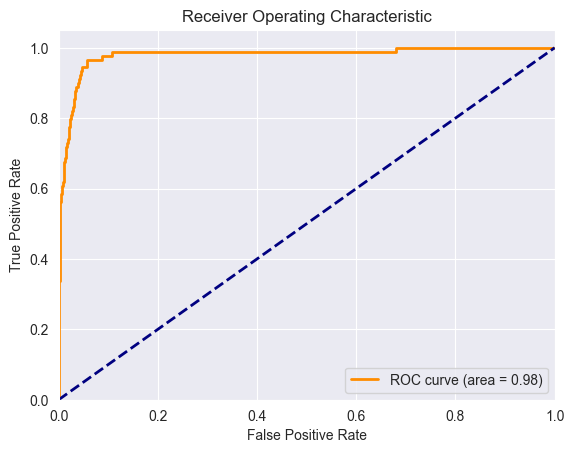

In [235]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming that 'probs' is the array of probabilities of the positive class 
# predicted by the classifier, and y_test' are the true labels

fpr, tpr, _ = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [218]:
# Predict probabilities on the test set
probs_test = xg_class.predict_proba(X_test_pca)[:, 1]

In [ ]:
# Replace 'id_column' with the actual identifier column name from your test data
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': probs_test  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('xgb_test_submission.csv', index=False)

In [230]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Assuming 'X_pca' is your entire feature set 'X' transformed with PCA
# And 'y' is your target variable

y = y.reset_index(drop=True)
# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5)
aucs = []

# Cross validation loop
for train_index, val_index in skf.split(X_pca, y):
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create, train, and validate the model
    model = LogisticRegression(penalty='l2', C=1.0)
    model.fit(X_train, y_train)

    # Predict probabilities for validation set
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # Calculate AUC for validation set
    auc = roc_auc_score(y_val, y_val_pred)
    aucs.append(auc)

# Calculate the mean AUC over all folds
mean_auc = np.mean(aucs)
print(f"Mean AUC across all folds: {mean_auc}")

# Predict on the real test set using the last model
# Ensure 'X_test_pca' is your test data transformed with the same PCA used for 'X_pca'
y_test_pred = model.predict_proba(X_test_pca)[:, 1]

Mean AUC across all folds: 0.9895317650332057


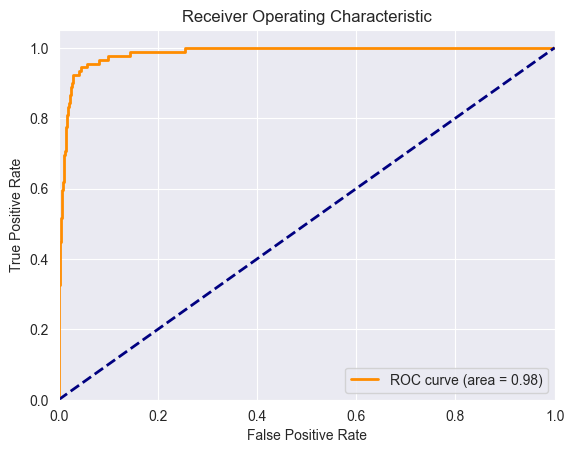

In [232]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming that 'probs' is the array of probabilities of the positive class 
# predicted by the classifier, and y_test' are the true labels

fpr, tpr, _ = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [231]:
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': y_test_pred  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('poly_submission.csv', index=False)

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'X_pca' is your entire feature set 'X' transformed with PCA
# And 'y' is your target variable

y = y.reset_index(drop=True)
# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5)
aucs = []

# degree for polynomial features
degree = 2

# Cross validation loop
for train_index, val_index in skf.split(X_pca, y):
    X_train, X_val = X_pca[train_index], X_pca[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create a pipeline: polynomial features followed by logistic regression
    pipeline = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("logistic_regression", LogisticRegression(penalty='l2', C=1.0))
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict probabilities for validation set
    y_val_pred = pipeline.predict_proba(X_val)[:, 1]

    # Calculate AUC for validation set
    auc = roc_auc_score(y_val, y_val_pred)
    aucs.append(auc)

# Calculate the mean AUC over all folds
mean_auc = np.mean(aucs)
print(f"Mean AUC across all folds: {mean_auc}")

# Predict on the real test set using the last model
# Ensure 'X_test_pca' is your test data transformed with the same PCA used for 'X_pca'
y_test_pred_new = pipeline.predict_proba(X_test_pca)[:, 1]

Mean AUC across all folds: 0.9537103322700125


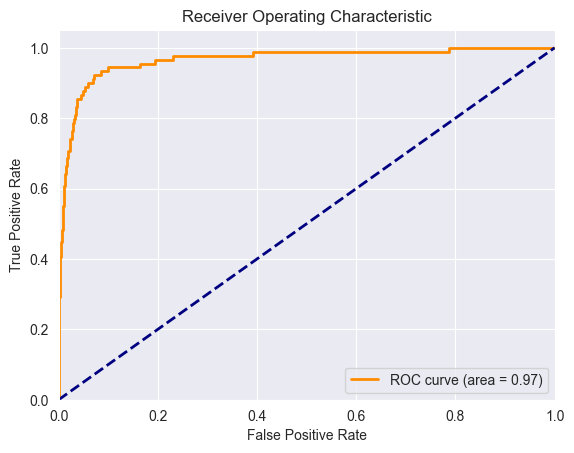

In [238]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming that 'probs' is the array of probabilities of the positive class 
# predicted by the classifier, and y_test' are the true labels

fpr, tpr, _ = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [239]:
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': y_test_pred_new  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('poly_new_submission.csv', index=False)